In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

filepath="DC_Properties.csv"
data=pd.read_csv(filepath,sep=",")

len(data)      

C:\Users\Public\Empty\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


158957

In [2]:
data = data.drop(columns = ["Unnamed: 0"])
data = data.drop_duplicates()
len(data)

157449

In [3]:
data = data[data.SQUARE != "PAR "]
len(data)

157212

In [4]:
data= data.dropna(subset= ["HEAT","ROOF","AYB","PRICE","SALEDATE"])
data.shape
len(data)

57702

In [5]:
data.columns

Index(['BATHRM', 'HF_BATHRM', 'HEAT', 'AC', 'NUM_UNITS', 'ROOMS', 'BEDRM',
       'AYB', 'YR_RMDL', 'EYB', 'STORIES', 'SALEDATE', 'PRICE', 'QUALIFIED',
       'SALE_NUM', 'GBA', 'BLDG_NUM', 'STYLE', 'STRUCT', 'GRADE', 'CNDTN',
       'EXTWALL', 'ROOF', 'INTWALL', 'KITCHENS', 'FIREPLACES', 'USECODE',
       'LANDAREA', 'GIS_LAST_MOD_DTTM', 'SOURCE', 'CMPLX_NUM', 'LIVING_GBA',
       'FULLADDRESS', 'CITY', 'STATE', 'ZIPCODE', 'NATIONALGRID', 'LATITUDE',
       'LONGITUDE', 'ASSESSMENT_NBHD', 'ASSESSMENT_SUBNBHD', 'CENSUS_TRACT',
       'CENSUS_BLOCK', 'WARD', 'SQUARE', 'X', 'Y', 'QUADRANT'],
      dtype='object')

In [6]:
data["BATHRM"]= pd.to_numeric(data["BATHRM"])
data["HF_BATHRM"]= pd.to_numeric(data["HF_BATHRM"])
data["SQUARE"]= pd.to_numeric(data["SQUARE"])
data["BATHRM_PER_SQR"] = (data["BATHRM"] + data["HF_BATHRM"]) / data["SQUARE"]

In [7]:
average_year = data[['AYB']].mean()
average_year

AYB    1934.586964
dtype: float64

In [8]:
data["AYB"]= pd.to_numeric(data["AYB"])

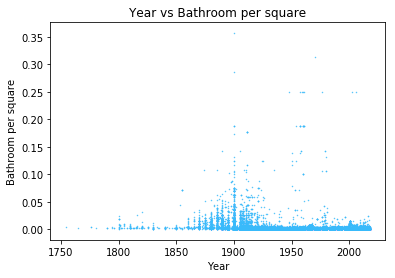

In [9]:
import matplotlib.pyplot as plt

y = data.BATHRM_PER_SQR
x = data.AYB

plt.scatter(x, y, s= 0.2, color='#39bafa')
plt.xlabel('Year')
plt.ylabel('Bathroom per square')
plt.title('Year vs Bathroom per square')
plt.savefig('year_vs_bathroom_per_square.png')

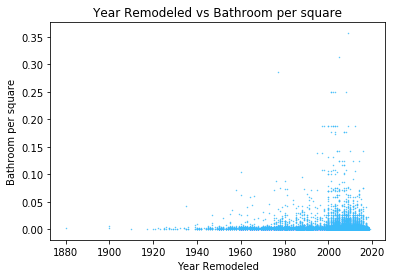

In [10]:
y = data[data.YR_RMDL > 1750].BATHRM_PER_SQR
x = data[data.YR_RMDL > 1750].YR_RMDL

plt.scatter(x, y, s= 0.2, color='#39bafa')
plt.xlabel('Year Remodeled')
plt.ylabel('Bathroom per square')
plt.title('Year Remodeled vs Bathroom per square')
plt.savefig('year_remodeled_vs_bathroom_per_square.png')

In [11]:
data.HEAT.unique()

array(['Warm Cool', 'Hot Water Rad', 'Forced Air', 'Elec Base Brd',
       'Ht Pump', 'Wall Furnace', 'Water Base Brd', 'Electric Rad',
       'Air Exchng', 'Evp Cool', 'No Data', 'Ind Unit', 'Gravity Furnac',
       'Air-Oil'], dtype=object)

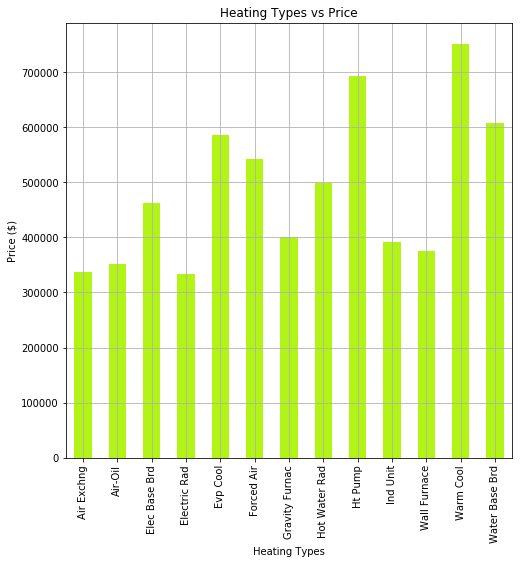

In [12]:
# Does heating type affect the price? 
heat_data = data[data.HEAT != 'No Data']
plt.figure(figsize=(8,8))
target_count = heat_data.groupby(["HEAT"])["PRICE"].mean()
target_count.plot(kind='bar', title='Heating Types vs Price',grid=True, color='#b1f416')
plt.xlabel('Heating Types')
plt.ylabel('Price ($)')
plt.xticks(rotation=90)
plt.savefig('heating_vs_price.jpeg')

In [13]:
import scipy.stats as sc
sc.kruskal(data['HEAT'].astype('category').cat.codes,data['PRICE'])

C:\Users\Public\Empty\lib\site-packages\scipy\stats\stats.py:5090: RuntimeWarning: overflow encountered in long_scalars
  h = 12.0 / (totaln * (totaln + 1)) * ssbn - 3 * (totaln + 1)


KruskalResult(statistic=13142281.065559736, pvalue=0.0)

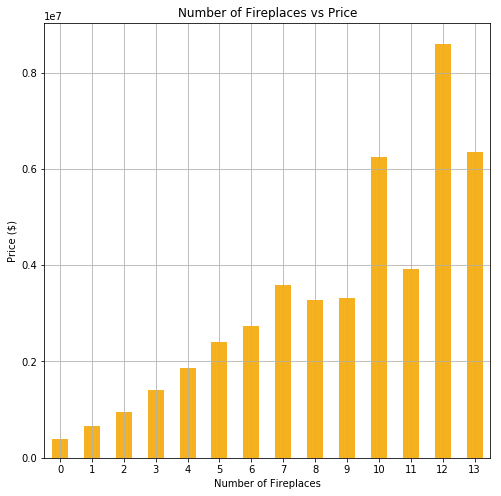

In [14]:
# Does number of fireplaces affect the price? 
plt.figure(figsize=(8,8))
target_count = data.groupby(["FIREPLACES"])["PRICE"].mean()
target_count.plot(kind='bar', title='Number of Fireplaces vs Price',grid=True, color='#f5b120')
plt.xlabel('Number of Fireplaces')
plt.ylabel('Price ($)')
plt.xticks(rotation=0)
plt.savefig('fireplaces_vs_price.png')

In [15]:
import scipy.stats as sc
sc.pearsonr(data['FIREPLACES'],data["PRICE"])

(0.4896839327650565, 0.0)

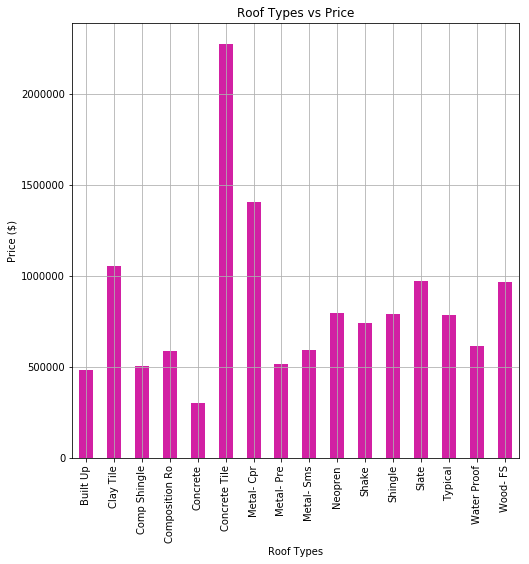

In [16]:
# Does roof type affect the price? 
plt.figure(figsize=(8,8))
target_count = data.groupby(["ROOF"])["PRICE"].mean()
target_count.plot(kind='bar', title='Roof Types vs Price',grid=True, color='#d220a3')
plt.xlabel('Roof Types')
plt.ylabel('Price ($)')
plt.savefig('roof_types_vs_price.png')

In [21]:
sc.kruskal(data['ROOF'].astype('category').cat.codes,data['PRICE'])

KruskalResult(statistic=13075501.04846215, pvalue=0.0)

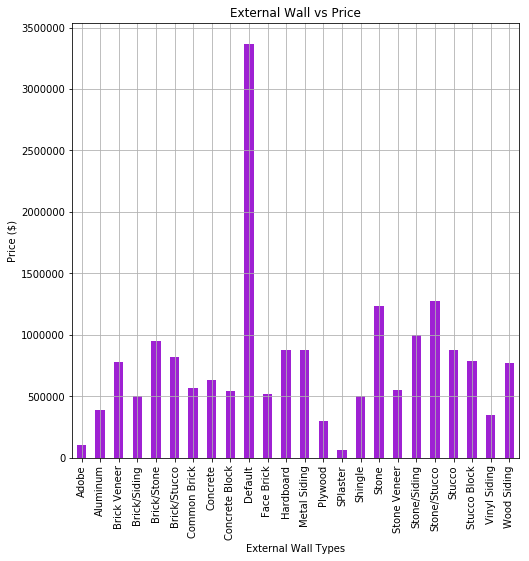

In [18]:
# Does extrenal wall type affect the price? 
plt.figure(figsize=(8,8))
target_count = data.groupby(["EXTWALL"])["PRICE"].mean()
target_count.plot(kind='bar', title='External Wall vs Price',grid=True, color='#9e21d3')
plt.xlabel('External Wall Types')
plt.ylabel('Price ($)')
plt.savefig('external_wall_vs_price.png')

In [20]:
sc.kruskal(data['EXTWALL'].astype('category').cat.codes,data['PRICE'])

KruskalResult(statistic=13675863.285083039, pvalue=0.0)